## Lab 6: Importing and Cleaning Data 

### Case study 1: cleaning the messy weather data. Sources: [http://www.rpubs.com/justinhtet/cleaning-messy-weather-dataset-with-tidyverse] and [https://rpubs.com/QuinninR/407585].

In [29]:
library(tidyverse)
library(htmltab)
library(readxl)
library(httr)
library(lubridate)

In [20]:
datacamp_url <- "https://assets.datacamp.com/production/repositories/34/datasets/b3c1036d9a60a9dfe0f99051d2474a54f76055ea/weather.rds"
weather = readRDS(url(datacamp_url))

In [4]:
weather %>% glimpse

Observations: 286
Variables: 35
$ X       <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18…
$ year    <int> 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2…
$ month   <int> 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 1…
$ measure <chr> "Max.TemperatureF", "Mean.TemperatureF", "Min.TemperatureF", …
$ X1      <chr> "64", "52", "39", "46", "40", "26", "74", "63", "52", "30.45"…
$ X2      <chr> "42", "38", "33", "40", "27", "17", "92", "72", "51", "30.71"…
$ X3      <chr> "51", "44", "37", "49", "42", "24", "100", "79", "57", "30.4"…
$ X4      <chr> "43", "37", "30", "24", "21", "13", "69", "54", "39", "30.56"…
$ X5      <chr> "42", "34", "26", "37", "25", "12", "85", "66", "47", "30.68"…
$ X6      <chr> "45", "42", "38", "45", "40", "36", "100", "93", "85", "30.42…
$ X7      <chr> "38", "30", "21", "36", "20", "-3", "92", "61", "29", "30.69"…
$ X8      <chr> "29", "24", "18", "28", "16", "3", "92", "70", "47", "30.77",…
$ X9      <chr> "49"

All the data entries are characters, which is usually the case if you download your data from some outside sources!

In [21]:
head(weather, n = 10)

X,year,month,measure,X1,X2,X3,X4,X5,X6,⋯,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31
<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,2014,12,Max.TemperatureF,64,42,51,43,42,45,⋯,44,47,46,59,50,52,52,41,30,30
2,2014,12,Mean.TemperatureF,52,38,44,37,34,42,⋯,39,45,44,52,44,45,46,36,26,25
3,2014,12,Min.TemperatureF,39,33,37,30,26,38,⋯,33,42,41,44,37,38,40,30,22,20
4,2014,12,Max.Dew.PointF,46,40,49,24,37,45,⋯,39,45,46,58,31,34,42,26,10,8
5,2014,12,MeanDew.PointF,40,27,42,21,25,40,⋯,34,42,44,43,29,31,35,20,4,5
6,2014,12,Min.DewpointF,26,17,24,13,12,36,⋯,25,37,41,29,28,29,27,10,-6,1
7,2014,12,Max.Humidity,74,92,100,69,85,100,⋯,89,100,100,100,70,70,76,64,50,57
8,2014,12,Mean.Humidity,63,72,79,54,66,93,⋯,79,91,98,75,60,60,65,51,38,44
9,2014,12,Min.Humidity,52,51,57,39,47,85,⋯,69,82,96,49,49,50,53,37,26,31


Some issues to address:
    * Column headers are values, not variable names: from X1 to X31
    * Meaningless column: X as observational index
    * Variables are stored in both the column: variable measure with max, min, and mean tempretures

In [22]:
# Gather the columns
weather2 <- gather(weather, day, value, X1:X31, na.rm = TRUE)
head(weather2, n = 10)

X,year,month,measure,day,value
<int>,<int>,<int>,<chr>,<chr>,<chr>
1,2014,12,Max.TemperatureF,X1,64
2,2014,12,Mean.TemperatureF,X1,52
3,2014,12,Min.TemperatureF,X1,39
4,2014,12,Max.Dew.PointF,X1,46
5,2014,12,MeanDew.PointF,X1,40
6,2014,12,Min.DewpointF,X1,26
7,2014,12,Max.Humidity,X1,74
8,2014,12,Mean.Humidity,X1,63
9,2014,12,Min.Humidity,X1,52


In [7]:
# First remove column of row names
weather2 <- weather2[, -1]

# Spread the data
weather3 <- spread(weather2, measure, value)
head(weather3, n = 10)

year,month,day,CloudCover,Events,Max.Dew.PointF,Max.Gust.SpeedMPH,Max.Humidity,Max.Sea.Level.PressureIn,Max.TemperatureF,⋯,Mean.VisibilityMiles,Mean.Wind.SpeedMPH,MeanDew.PointF,Min.DewpointF,Min.Humidity,Min.Sea.Level.PressureIn,Min.TemperatureF,Min.VisibilityMiles,PrecipitationIn,WindDirDegrees
<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2014,12,X1,6,Rain,46,29,74,30.45,64,⋯,10,13,40,26,52,30.01,39,10,0.01,268
2014,12,X10,8,Rain,45,29,100,29.58,48,⋯,3,13,39,37,89,29.43,38,1,0.28,357
2014,12,X11,8,Rain-Snow,37,28,92,29.81,39,⋯,7,13,31,27,82,29.44,32,1,0.02,230
2014,12,X12,7,Snow,28,21,85,29.88,39,⋯,10,11,27,25,64,29.81,31,7,T,286
2014,12,X13,5,,28,23,75,29.86,42,⋯,10,12,26,24,55,29.78,32,10,T,298
2014,12,X14,4,,29,20,82,29.91,45,⋯,10,10,27,25,53,29.78,33,10,0.00,306
2014,12,X15,2,,33,21,89,30.15,42,⋯,10,6,29,27,60,29.91,32,10,0.00,324
2014,12,X16,8,Rain,42,10,96,30.17,44,⋯,9,4,36,30,73,29.92,35,5,T,79
2014,12,X17,8,Rain,46,26,100,29.91,49,⋯,6,11,41,32,70,29.69,41,1,0.43,311


Now get the data ready for analysis.

In [8]:
# Remove X's from day column
# Unite the year, month, and day columns
# Convert date column to proper date format using lubridates's ymd()
# Rearrange columns using dplyr's select()

weather4 <- weather3 %>% mutate(day = str_replace(day, "X", "")) %>% 
                unite(date, year, month, day, sep = "-") %>% 
                    mutate(date = ymd(date)) %>%
                        select(date, Events, CloudCover:WindDirDegrees)

# View the head of weather5
head(weather4, n = 10)

date,Events,CloudCover,Max.Dew.PointF,Max.Gust.SpeedMPH,Max.Humidity,Max.Sea.Level.PressureIn,Max.TemperatureF,Max.VisibilityMiles,Max.Wind.SpeedMPH,⋯,Mean.VisibilityMiles,Mean.Wind.SpeedMPH,MeanDew.PointF,Min.DewpointF,Min.Humidity,Min.Sea.Level.PressureIn,Min.TemperatureF,Min.VisibilityMiles,PrecipitationIn,WindDirDegrees
<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2014-12-01,Rain,6,46,29,74,30.45,64,10,22,⋯,10,13,40,26,52,30.01,39,10,0.01,268
2014-12-10,Rain,8,45,29,100,29.58,48,10,23,⋯,3,13,39,37,89,29.43,38,1,0.28,357
2014-12-11,Rain-Snow,8,37,28,92,29.81,39,10,21,⋯,7,13,31,27,82,29.44,32,1,0.02,230
2014-12-12,Snow,7,28,21,85,29.88,39,10,16,⋯,10,11,27,25,64,29.81,31,7,T,286
2014-12-13,,5,28,23,75,29.86,42,10,17,⋯,10,12,26,24,55,29.78,32,10,T,298
2014-12-14,,4,29,20,82,29.91,45,10,15,⋯,10,10,27,25,53,29.78,33,10,0.00,306
2014-12-15,,2,33,21,89,30.15,42,10,15,⋯,10,6,29,27,60,29.91,32,10,0.00,324
2014-12-16,Rain,8,42,10,96,30.17,44,10,8,⋯,9,4,36,30,73,29.92,35,5,T,79
2014-12-17,Rain,8,46,26,100,29.91,49,10,20,⋯,6,11,41,32,70,29.69,41,1,0.43,311


In [23]:
# # Replace "T" with "0" (T = trace)
# weather5$PrecipitationIn <- str_replace(weather5$Precipitation, "T", "0")
# Convert characters to numerics
weather5 <- weather4 %>% mutate(PrecipitationIn = str_replace(PrecipitationIn, "T", "0")) %>% 
                mutate_at(vars(CloudCover:WindDirDegrees), list(as.numeric))
str(weather5)

'data.frame':	366 obs. of  23 variables:
 $ date                     : Date, format: "2014-12-01" "2014-12-10" ...
 $ Events                   : chr  "Rain" "Rain" "Rain-Snow" "Snow" ...
 $ CloudCover               : num  6 8 8 7 5 4 2 8 8 7 ...
 $ Max.Dew.PointF           : num  46 45 37 28 28 29 33 42 46 34 ...
 $ Max.Gust.SpeedMPH        : num  29 29 28 21 23 20 21 10 26 30 ...
 $ Max.Humidity             : num  74 100 92 85 75 82 89 96 100 89 ...
 $ Max.Sea.Level.PressureIn : num  30.4 29.6 29.8 29.9 29.9 ...
 $ Max.TemperatureF         : num  64 48 39 39 42 45 42 44 49 44 ...
 $ Max.VisibilityMiles      : num  10 10 10 10 10 10 10 10 10 10 ...
 $ Max.Wind.SpeedMPH        : num  22 23 21 16 17 15 15 8 20 23 ...
 $ Mean.Humidity            : num  63 95 87 75 65 68 75 85 85 73 ...
 $ Mean.Sea.Level.PressureIn: num  30.1 29.5 29.6 29.9 29.8 ...
 $ Mean.TemperatureF        : num  52 43 36 35 37 39 37 40 45 40 ...
 $ Mean.VisibilityMiles     : num  10 3 7 10 10 10 10 9 6 10 ...
 $ Mean.

In [31]:
summary(weather5)

      date               Events            CloudCover    Max.Dew.PointF 
 Min.   :2014-12-01   Length:366         Min.   :0.000   Min.   :-6.00  
 1st Qu.:2015-03-02   Class :character   1st Qu.:3.000   1st Qu.:32.00  
 Median :2015-06-01   Mode  :character   Median :5.000   Median :47.50  
 Mean   :2015-06-01                      Mean   :4.708   Mean   :45.48  
 3rd Qu.:2015-08-31                      3rd Qu.:7.000   3rd Qu.:61.00  
 Max.   :2015-12-01                      Max.   :8.000   Max.   :75.00  
                                                                        
 Max.Gust.SpeedMPH  Max.Humidity     Max.Sea.Level.PressureIn Max.TemperatureF
 Min.   : 0.00     Min.   :  39.00   Min.   :29.58            Min.   :18.00   
 1st Qu.:21.00     1st Qu.:  73.25   1st Qu.:30.00            1st Qu.:42.00   
 Median :25.50     Median :  86.00   Median :30.14            Median :60.00   
 Mean   :26.99     Mean   :  85.69   Mean   :30.16            Mean   :58.93   
 3rd Qu.:31.25     3r

Check the NA's in Max.Gust.SpeedMPH.

In [10]:
weather5 %>% filter(is.na(Max.Gust.SpeedMPH)) %>% print

        date Events CloudCover Max.Dew.PointF Max.Gust.SpeedMPH Max.Humidity
1 2015-05-18    Fog          6             52                NA          100
2 2015-06-03                 7             48                NA           93
3 2015-08-08                 4             61                NA           87
4 2015-09-01                 1             63                NA           78
5 2015-10-12                 0             56                NA           89
6 2015-11-03                 1             44                NA           82
  Max.Sea.Level.PressureIn Max.TemperatureF Max.VisibilityMiles
1                    30.30               58                  10
2                    30.31               56                  10
3                    30.02               76                  10
4                    30.06               79                  10
5                    29.86               76                  10
6                    30.25               73                  10
  Max.Wind.Sp

In [33]:
str(weather5$Events)

 chr [1:366] "Rain" "Rain" "Rain-Snow" "Snow" "" "" "" "Rain" "Rain" "Rain" ...


In [11]:
weather6 <- weather5 %>% mutate(Events = ifelse(Events=="","None",Events)) 
str(weather6$Events)

 chr [1:366] "Rain" "Rain" "Rain-Snow" "Snow" "None" "None" "None" "Rain" ...


In [12]:
write_csv(weather6, path = "weather_clean.csv")

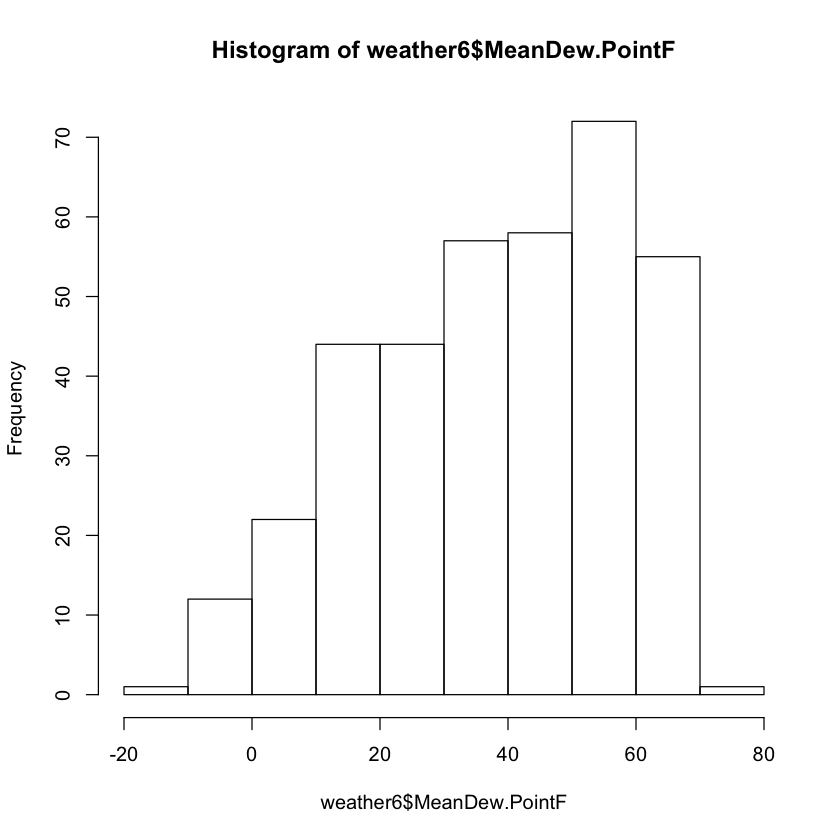

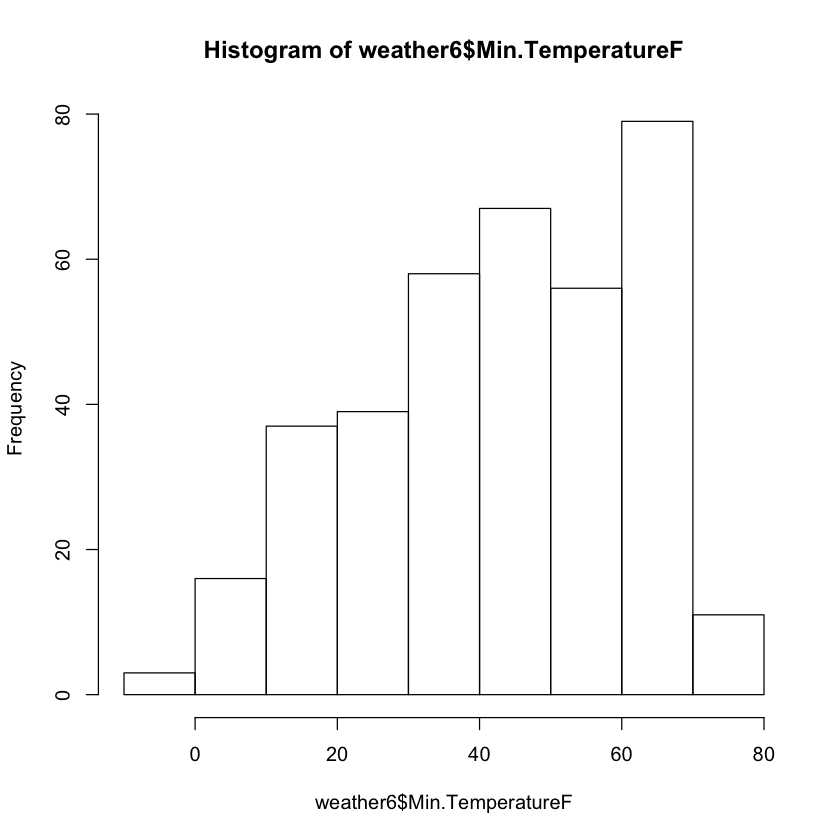

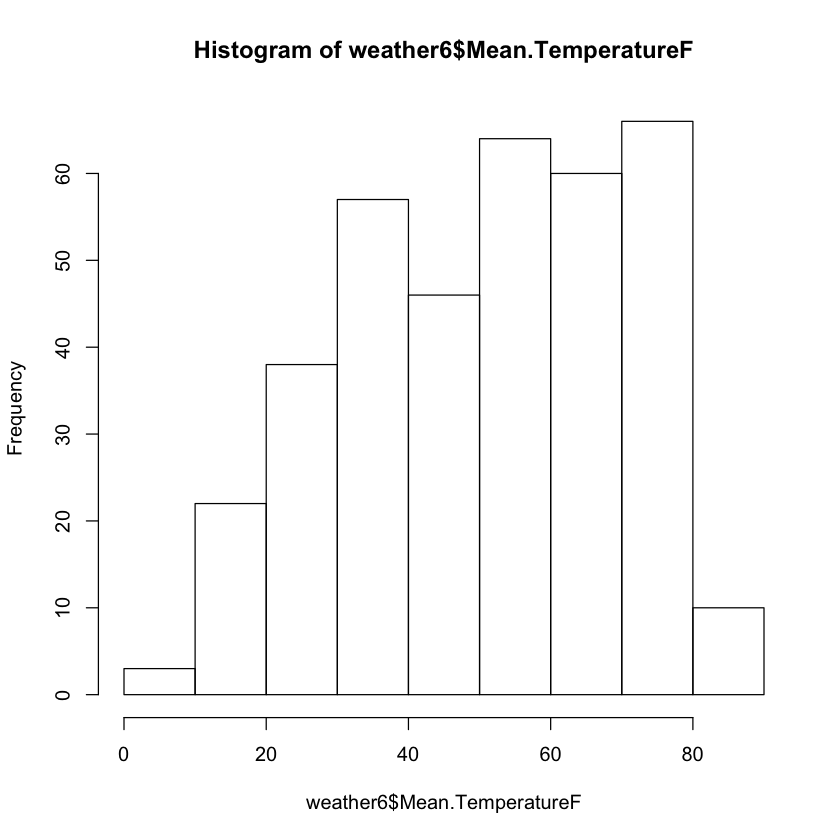

In [43]:
# check for errors before analysis
# summary(weather6$Mean.VisibilityMiles)
hist(weather6$MeanDew.PointF)
hist(weather6$Min.TemperatureF)
hist(weather6$Mean.TemperatureF)


Call:
lm(formula = Max.TemperatureF ~ Max.Humidity + Min.Humidity, 
    data = weather6)

Residuals:
    Min      1Q  Median      3Q     Max 
-40.820 -16.878   1.309  16.910  37.085 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  56.719816   3.367122  16.845   <2e-16 ***
Max.Humidity  0.028230   0.021299   1.325    0.186    
Min.Humidity -0.004286   0.061150  -0.070    0.944    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 20.05 on 363 degrees of freedom
Multiple R-squared:  0.004882,	Adjusted R-squared:  -0.0006004 
F-statistic: 0.8905 on 2 and 363 DF,  p-value: 0.4113


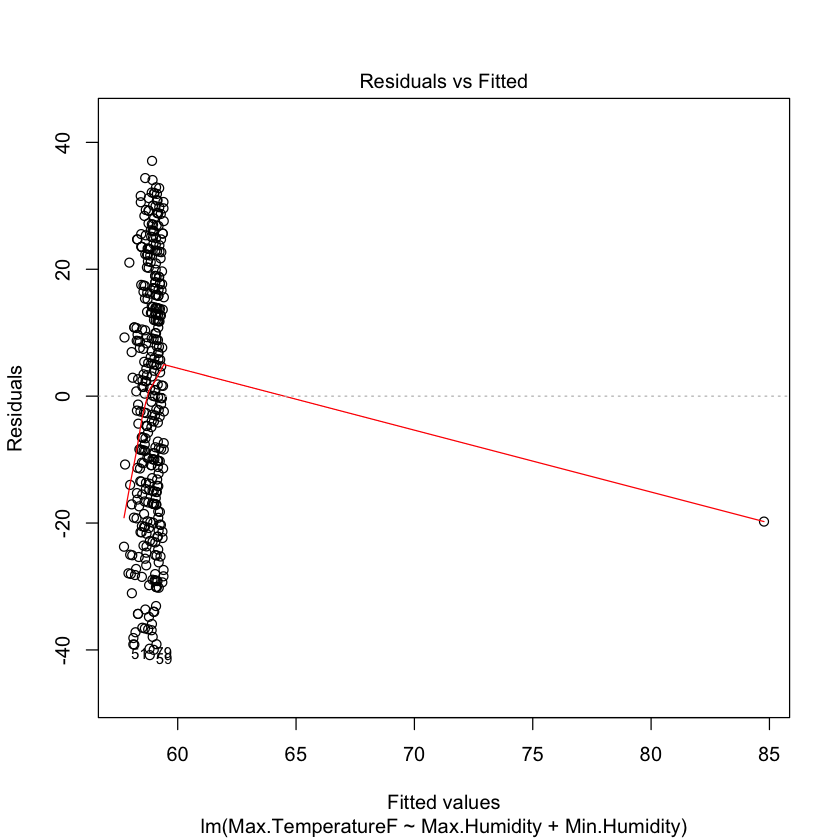

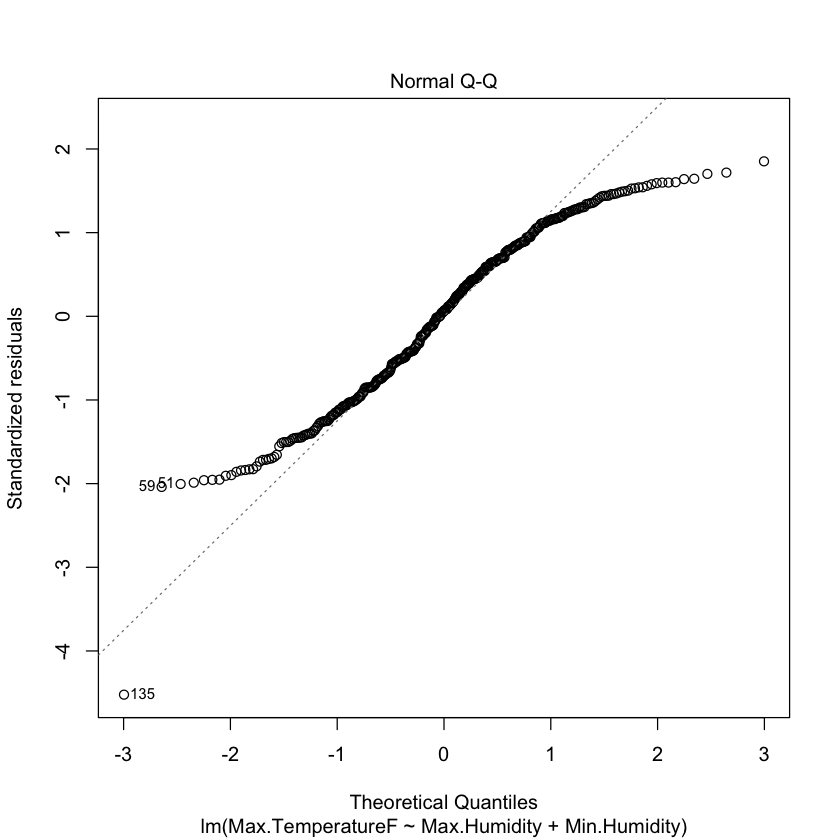

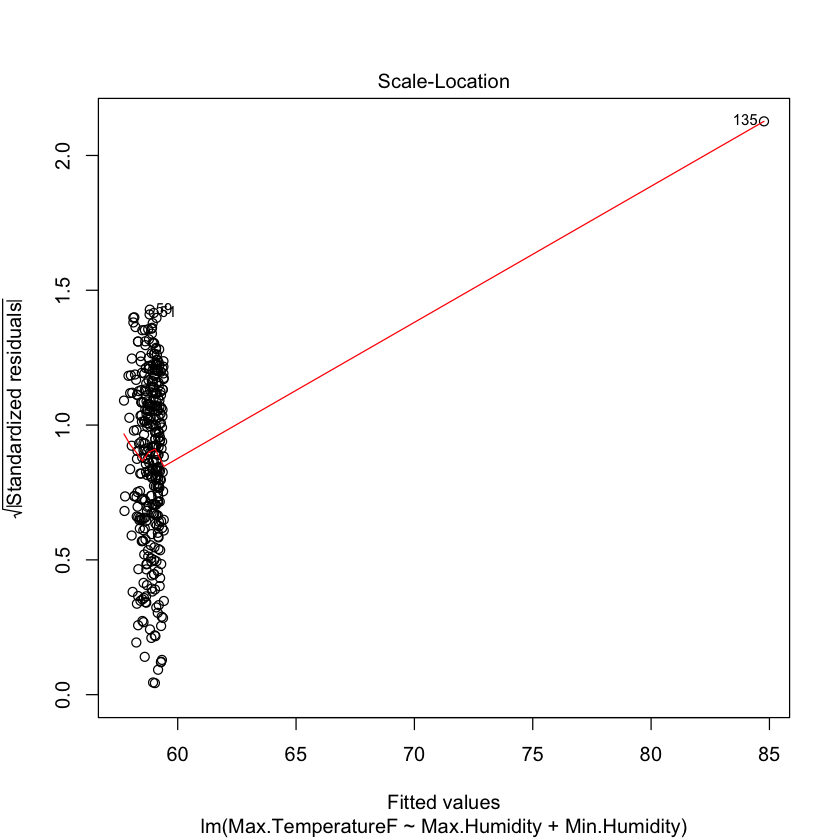

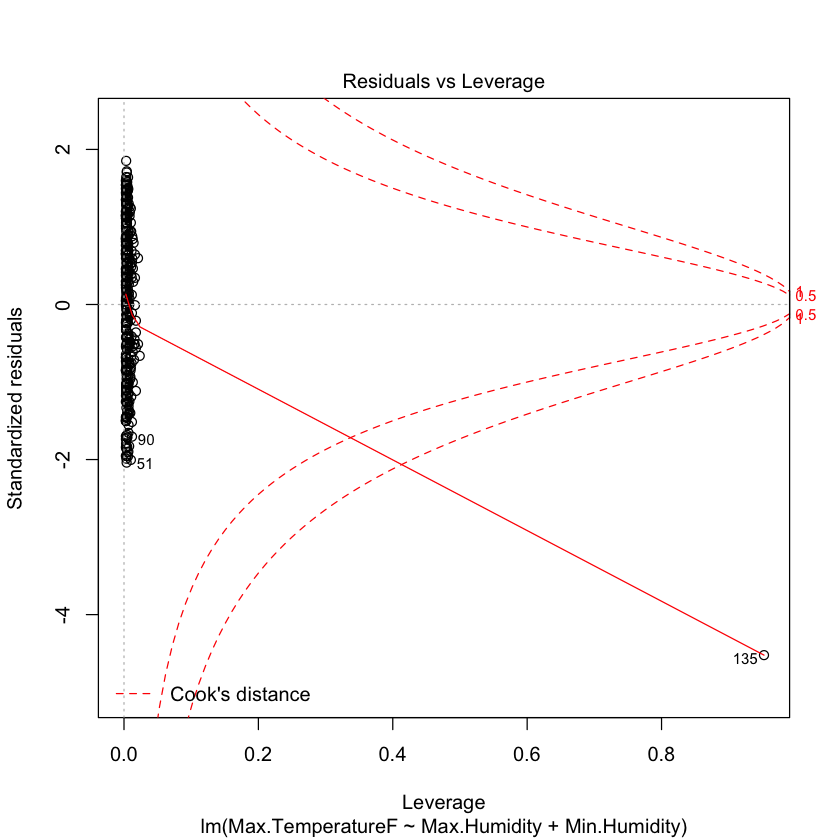

In [25]:
# Linear regression
hum_temp <- lm(Max.TemperatureF ~ Max.Humidity + Min.Humidity, data=weather6)

summary(hum_temp)
plot(hum_temp)

In [17]:
res_hum_temp <- hum_temp$residuals
res_hum_temp

1            2            3            4            5            6 
  5.39525604 -11.33218293 -20.10835556 -19.91250660 -16.63272238 -13.82857134 
           7            8            9           10           11           12 
-17.02442029 -15.22026924 -10.33218293 -15.02442029 -21.46485185 -17.10835556 
          13           14           15           16           17           18 
-23.02442029 -22.91250660 -15.02442029 -12.33218293 -13.33218293  -0.33218293 
          19           20           21           22           23           24 
 -8.49283027  -6.49283027  -6.66070080 -17.32495974  -8.33218293 -27.93326183 
          25           26           27           28           29           30 
-28.12911078 -15.46485185 -16.91250660 -14.33218293 -21.10835556 -30.10835556 
          31           32           33           34           35           36 
-10.33218293 -25.01719710 -34.26900289 -25.29698132 -21.33218293 -23.63272238 
          37           38           39           40           41           42 
-33.99644187 -28.10835556 -20.52080869 -36.40889500  -8.13633398 -12.94048502 
          43           44           45           46           47           48 
-17.01719710 -19.18506763 -24.63272238 -21.71665765 -21.43687343 -25.33218293 
          49           50           51           52           53           54 
-20.71665765 -30.10835556 -40.10835556 -34.77261449 -26.63272238 -22.33218293 
          55           56           57           58           59           60 
-25.10835556 -37.85654976  -7.33218293  -8.35293816 -40.77261449 -32.99644187 
          61           62           63           64           65           66 
-39.10113236 -28.99644187 -28.40889500 -28.99644187 -33.68867922 -29.10835556 
          67           68           69           70           71           72 
-36.68867922 -29.33218293 -39.10835556 -39.10113236 -35.88452818 -29.80059291 
          73           74           75           76           77           78 
-29.10835556 -28.33218293 -38.07315394 -25.10835556 -20.33218293 -25.54878711 
          79           80           81           82           83           84 
-39.77261449 -24.10835556 -36.88452818 -30.98921867 -27.15708921 -36.57676554 
          85           86           87           88           89           90 
-20.63272238 -23.02442029 -37.21304605 -30.10835556 -30.33218293 -34.10835556 
          91           92           93           94           95           96 
-29.10835556 -11.33218293  -2.33218293 -15.18506763 -18.46485185 -20.33218293 
          97           98           99          100          101          102 
-18.33218293 -13.29698132  -8.33218293 -27.82134814 -23.62549919 -22.10835556 
         103          104          105          106          107          108 
-27.33218293 -18.22026924 -19.04517552 -24.90528341 -23.54878711  -9.91250660 
         109          110          111          112          113          114 
 -3.33218293 -15.22026924 -19.22026924 -16.18506763 -26.10835556 -13.46485185 
         115          116          117          118          119          120 
 -8.49283027 -16.10835556 -19.66070080 -34.26900289 -20.40889500 -16.71665765 
         121          122          123          124          125          126 
-10.80059291 -10.65347761  -4.33218293  -2.02442029   9.81493237  10.61908342 
         127          128          129          130          131          132 
  6.22738551   9.37450081   1.59110500   5.97557971   0.97557971  -8.66070080 
         133          134          135          136          137          138 
  2.75897553  -8.33218293 -19.51276277   7.97557971  -7.52080869  -8.32495974 
         139          140          141          142          143          144 
 -2.21304605  -2.52080869  -1.29698132   5.33929920  -4.68867922  -0.33218293 
         145          146          147          148          149          150 
 -4.02442029  -7.33218293  -9.66070080 -17.10835556 -17.10835556 -17.10835556 
         151          152          153          154          

In [ ]:
# one (two) sample t test
t.test(x, y = NULL,
       alternative = c("two.sided", "less", "greater"),
       mu = 0, paired = FALSE, var.equal = FALSE,
       conf.level = 0.95, ...)

t.test(x,y)

## Case Study 2: Using the map data
* This is an exercise adopted from <http://rdpeng.github.io/RProgDA/mapping.html> and <https://mikegruz.github.io/articles/2017-03/mapping-in-R>

Professor Terhorst showed you an example of using datasets from [`tidycensus`](https://walkerke.github.io/tidycensus/articles/basic-usage.html), which gives you an access to Census and American community data. We are going to look through different levels of map data. Let's first learn [`maps`] with state-level information.

In [31]:
require(ggplot2)
require(maps)
require(RCurl)

Loading required package: maps


Attaching package: ‘maps’


The following object is masked from ‘package:purrr’:

    map




In [32]:
states = map_data('state')
head(states)

long,lat,group,order,region,subregion
<dbl>,<dbl>,<dbl>,<int>,<chr>,<chr>
-87.46201,30.38968,1,1,alabama,NA
-87.48493,30.37249,1,2,alabama,NA
-87.52503,30.37249,1,3,alabama,NA
-87.53076,30.33239,1,4,alabama,NA
-87.57087,30.32665,1,5,alabama,NA
-87.58806,30.32665,1,6,alabama,NA


* Geometric information from [`map_data`] function gives you boundary information for each state. This allows us to simply use [`ggplot`] function to work with the census data.

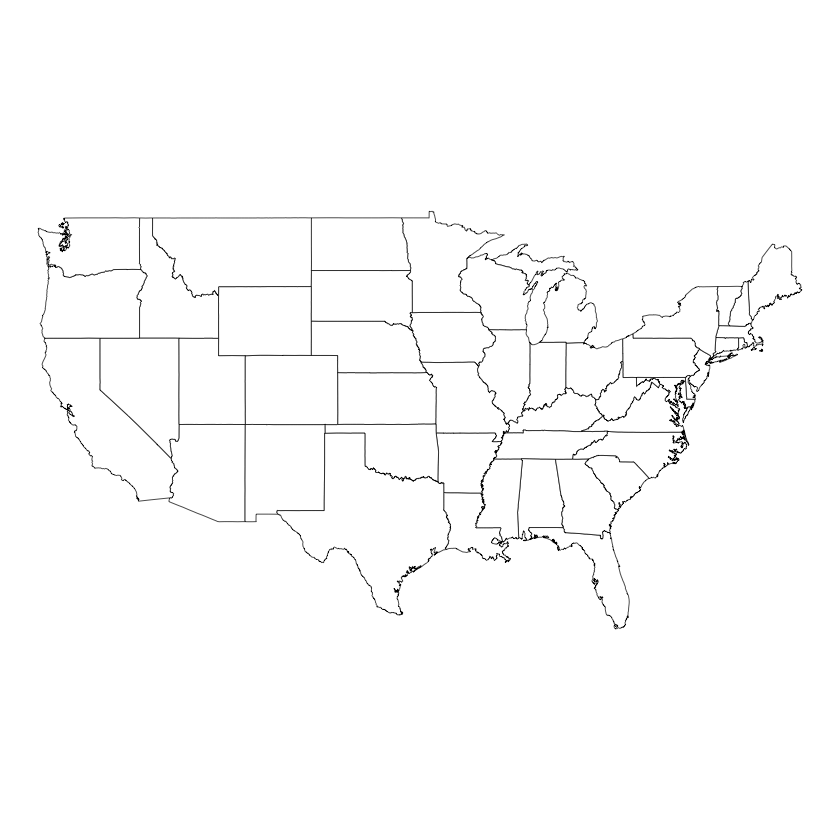

In [33]:
ggplot(data=states) + 
  geom_polygon(aes(x=long, y=lat, group=group), colour="black", fill='white', size=.2) +
  coord_fixed(1.3) + theme_void()

Now that we have all the information about working with map data, let's create a more interesting map!

In [44]:
data(votes.repub)
head(votes.repub)

,1856,1860,1864,1868,1872,1876,1880,1884,1888,1892,⋯,1940,1944,1948,1952,1956,1960,1964,1968,1972,1976
Alabama,NA,NA,NA,51.44,53.19,40.02,36.98,38.44,32.28,3.95,⋯,14.34,18.20,19.04,35.02,39.39,41.75,69.5,14.0,72.4,43.48
Alaska,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,50.94,34.1,45.3,58.1,62.91
Arizona,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,36.01,40.90,43.82,58.35,60.99,55.52,50.4,54.8,64.7,58.62
Arkansas,NA,NA,NA,53.73,52.17,39.88,39.55,40.50,38.07,32.01,⋯,20.87,29.84,21.02,43.76,45.82,43.06,43.9,30.8,68.9,34.97
California,18.77,32.96,58.63,50.24,56.38,50.88,48.92,52.08,49.95,43.76,⋯,41.35,42.99,47.14,56.39,55.40,50.10,40.9,47.8,55.0,50.89
Colorado,NA,NA,NA,NA,NA,NA,51.28,54.39,55.31,41.13,⋯,50.92,53.21,46.52,60.27,59.49,54.63,38.7,50.5,62.6,55.89


* We have to combine the geographic information and the voting information. This is where we need to carefully think about what kind join function we want to use!

In [34]:
state_votes = votes.repub %>%
                tbl_df() %>%
                mutate(state = rownames(votes.repub),
                     state = tolower(state)) %>% 
                right_join(states, by = c("state" = "region")) 
head(state_votes)
dim(state_votes)

1856,1860,1864,1868,1872,1876,1880,1884,1888,1892,⋯,1964,1968,1972,1976,state,long,lat,group,order,subregion
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<chr>
NA,NA,NA,51.44,53.19,40.02,36.98,38.44,32.28,3.95,⋯,69.5,14,72.4,43.48,alabama,-87.46201,30.38968,1,1,NA
NA,NA,NA,51.44,53.19,40.02,36.98,38.44,32.28,3.95,⋯,69.5,14,72.4,43.48,alabama,-87.48493,30.37249,1,2,NA
NA,NA,NA,51.44,53.19,40.02,36.98,38.44,32.28,3.95,⋯,69.5,14,72.4,43.48,alabama,-87.52503,30.37249,1,3,NA
NA,NA,NA,51.44,53.19,40.02,36.98,38.44,32.28,3.95,⋯,69.5,14,72.4,43.48,alabama,-87.53076,30.33239,1,4,NA
NA,NA,NA,51.44,53.19,40.02,36.98,38.44,32.28,3.95,⋯,69.5,14,72.4,43.48,alabama,-87.57087,30.32665,1,5,NA
NA,NA,NA,51.44,53.19,40.02,36.98,38.44,32.28,3.95,⋯,69.5,14,72.4,43.48,alabama,-87.58806,30.32665,1,6,NA


[1] 15537    37

* Now that we have the combined information, let's go back to the ggplot and see if we can visualize this information!

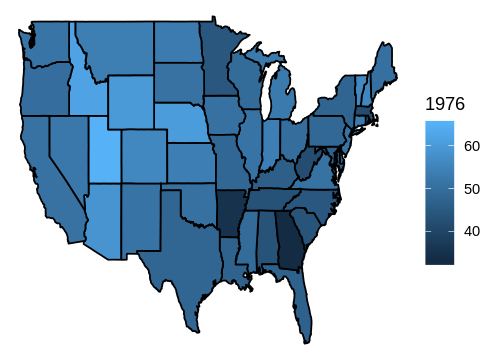

In [81]:
gp_state =  ggplot(data=state_votes, 
                    aes(x = long, y = lat, group = group, fill = `1976`)) +
                geom_polygon(color = "black") + 
                theme_void() 
print(gp_state)

The color scheme is not informative at all. We can specify these by looking at [`scale_fill_gradient2`].

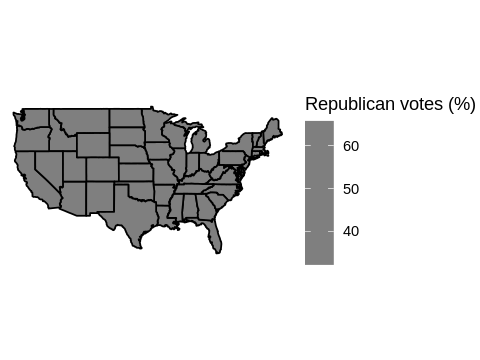

In [84]:
curr_year = state_votes$`1976`
vote_mid = mean(curr_year)#, na.rm=TRUE)

gp_state + 
    scale_fill_gradient2(midpoint = vote_mid,
                         low = "blue", mid="white", high = "red", 
                         name = "Republican votes (%)") +
                         coord_fixed(1.3)
# png('state_voting_1976.png', width=600, height=400)
#     print(gp_state)
# dev.off()


## Exercises for the lab (County level data)
* Similar to state information, [`map_data`] function also gives us county-level information.

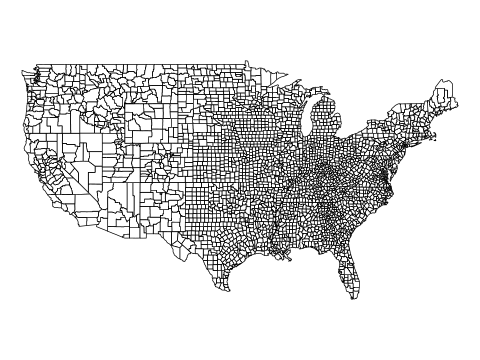

In [86]:
# pull in county boundaries data
counties = map_data("county")

ggplot(data=counties) + 
  geom_polygon(aes(x=long, y=lat, group=group), colour="black", fill='white', size=.2) +
  coord_fixed(1.3) + theme_void()

# Let's look at the last election data based on the county

In [89]:
require(RCurl)

elect.data = read_csv(getURL("https://raw.githubusercontent.com/tonmcg/County_Level_Election_Results_12-16/master/2016_US_County_Level_Presidential_Results.csv"))

# inspect the data
head(elect.data)
dim(elect.data)

Warning message:
“Missing column names filled in: 'X1' [1]”

X1,votes_dem,votes_gop,total_votes,per_dem,per_gop,diff,per_point_diff,state_abbr,county_name,combined_fips
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>
0,93003,130413,246588,0.3771595,0.52887,37410,15.17%,AK,Alaska,2013
1,93003,130413,246588,0.3771595,0.52887,37410,15.17%,AK,Alaska,2016
2,93003,130413,246588,0.3771595,0.52887,37410,15.17%,AK,Alaska,2020
3,93003,130413,246588,0.3771595,0.52887,37410,15.17%,AK,Alaska,2050
4,93003,130413,246588,0.3771595,0.52887,37410,15.17%,AK,Alaska,2060
5,93003,130413,246588,0.3771595,0.52887,37410,15.17%,AK,Alaska,2068


[1] 3141   11

## Instead of having 50 entries for each state, now we have 3141 entries for each county! We need a systematic way of incorporating these counties together. 

*count.fips* is your helper!

In [90]:
head(county.fips)

fips,polyname
<int>,<chr>
1001,"alabama,autauga"
1003,"alabama,baldwin"
1005,"alabama,barbour"
1007,"alabama,bibb"
1009,"alabama,blount"
1011,"alabama,bullock"


### Exercise 1: Split polyname into a information about *region* and *subregion*

In [93]:
fips.codes = county.fips %>%
    separate(polyname, c("region", "subregion"), ",")

head(fips.codes)

fips,region,subregion
<int>,<chr>,<chr>
1001,alabama,autauga
1003,alabama,baldwin
1005,alabama,barbour
1007,alabama,bibb
1009,alabama,blount
1011,alabama,bullock


### Exercies 2: Check the counties that shows up in the *counties* dataset but not in *fips.codes*. Once you figure out counties, check how many entries are different for each region.
This will help you figure out if the county names are the same in both dataset.

In [94]:
anti_join(counties, fips.codes, by=c("region","subregion")) %>%
  select(region,subregion) %>%
  group_by(region,subregion) %>%
  summarise(n())

region,subregion,n()
<chr>,<chr>,<int>
florida,okaloosa,37
louisiana,st martin,85
north carolina,currituck,97
texas,galveston,62
virginia,accomack,83
washington,pierce,87
washington,san juan,53


In [95]:
fips.codes %>%
  filter(grepl("okaloo|martin|curri|galve|acco|pierc|juan", subregion)) %>% head

fips,region,subregion
<int>,<chr>,<chr>
8111,colorado,san juan
12085,florida,martin
12091,florida,okaloosa:main
12091,florida,okaloosa:spit
13229,georgia,pierce
18101,indiana,martin


### Exercies 3: What does the second exercise tell you? Is subregion enough to describe each entries?

In [97]:
fips.codes = county.fips %>%
    # separate region and subregion
    separate(polyname, c("region","subregion"), ",") %>%
    # separate subregion and sub-subregion
    separate(subregion, c("subregion","subsubregion"), ":")

Warning message:
“Expected 2 pieces. Missing pieces filled with `NA` in 3069 rows [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”

In [98]:
anti_join(counties, fips.codes, by=c("region","subregion")) %>%
    select(region,subregion) %>%
    group_by(region,subregion) %>%
    summarise(n())

region,subregion,n()
<chr>,<chr>,<int>


### Exercies 4: With the final *fip.codes* information combine the information from *counties* and *fips.codes*. With the combined information, create the percentage of votes for trump.

In [105]:
counties = full_join(counties, fips.codes, by=c("region","subregion"))

In [106]:
counties.elect = full_join(counties, elect.data, by=c("fips"="combined_fips"))

head(counties.elect)

long,lat,group,order,region,subregion,fips.x,subsubregion.x,fips.y,subsubregion.y,⋯,X1,votes_dem,votes_gop,total_votes,per_dem,per_gop,diff,per_point_diff,state_abbr,county_name
<dbl>,<dbl>,<dbl>,<int>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
-86.50517,32.34920,1,1,alabama,autauga,1001,NA,1001,NA,⋯,29,5908,18110,24661,0.2395685,0.7343579,12202,49.48%,AL,Autauga County
-86.53382,32.35493,1,2,alabama,autauga,1001,NA,1001,NA,⋯,29,5908,18110,24661,0.2395685,0.7343579,12202,49.48%,AL,Autauga County
-86.54527,32.36639,1,3,alabama,autauga,1001,NA,1001,NA,⋯,29,5908,18110,24661,0.2395685,0.7343579,12202,49.48%,AL,Autauga County
-86.55673,32.37785,1,4,alabama,autauga,1001,NA,1001,NA,⋯,29,5908,18110,24661,0.2395685,0.7343579,12202,49.48%,AL,Autauga County
-86.57966,32.38357,1,5,alabama,autauga,1001,NA,1001,NA,⋯,29,5908,18110,24661,0.2395685,0.7343579,12202,49.48%,AL,Autauga County
-86.59111,32.37785,1,6,alabama,autauga,1001,NA,1001,NA,⋯,29,5908,18110,24661,0.2395685,0.7343579,12202,49.48%,AL,Autauga County


In [107]:
counties.elect = counties.elect %>%
                  mutate(trump.perc = (per_gop - per_dem)*100)

### Exercies 5: Finally, plot the map based on the last election data!

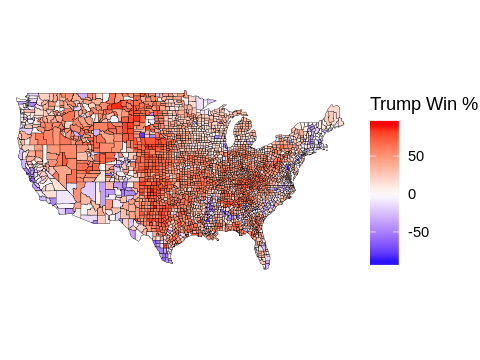

In [108]:
ggplot(data=counties.elect) + 
  # use "fill=trump.perc" to create a gradient based on two-party differential
  geom_polygon(aes(x=long, y=lat, group=group, fill=trump.perc), colour="black", size=.1) +
  # use scale_fill_gradient to do a red-blue gradient
  scale_fill_gradient2(low = "blue", mid="white", high = "red", name="Trump Win %") +
  coord_fixed(1.3) + theme_void()

### Small step: look at the state you are from and see how your counties voted!

[1] "alabama"              "arizona"              "arkansas"            
 [4] "california"           "colorado"             "connecticut"         
 [7] "delaware"             "district of columbia" "florida"             
[10] "georgia"              "idaho"                "illinois"            
[13] "indiana"              "iowa"                 "kansas"              
[16] "kentucky"             "louisiana"            "maine"               
[19] "maryland"             "massachusetts"        "michigan"            
[22] "minnesota"            "mississippi"          "missouri"            
[25] "montana"              "nebraska"             "nevada"              
[28] "new hampshire"        "new jersey"           "new mexico"          
[31] "new york"             "north carolina"       "north dakota"        
[34] "ohio"                 "oklahoma"             "oregon"              
[37] "pennsylvania"         "rhode island"         "south carolina"      
[40] "south dakota"         "tennessee"            "texas"               
[43] "utah"                 "vermont"              "virginia"            
[46] "washington"           "west virginia"        "wisconsin"           
[49] "wyoming"              NA

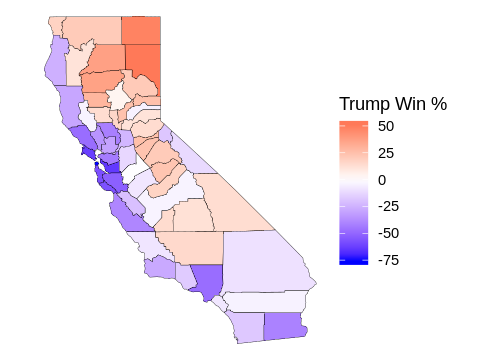

In [114]:
unique(counties.elect$region)
my_county = counties.elect %>% filter(region == 'california')

ggplot(data=my_county) + 
  # use "fill=trump.perc" to create a gradient based on two-party differential
  geom_polygon(aes(x=long, y=lat, group=group, fill=trump.perc), colour="black", size=.1) +
  # use scale_fill_gradient to do a red-blue gradient
  scale_fill_gradient2(low = "blue", mid="white", high = "red", name="Trump Win %") +
  coord_fixed(1.3) + theme_void()